In [15]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage, HumanMessage
from dotenv import load_dotenv

# store data in RAM
from langgraph.checkpoint.memory import MemorySaver


In [16]:
load_dotenv()
model = ChatOpenAI(model="gpt-4o")

In [17]:
class ChatState(TypedDict):
    
    messages : Annotated[list[BaseMessage], add_messages]

In [18]:
def chat_node(state : ChatState):
    
    messages = state["messages"]
    
    result = model.invoke(messages)
    
    return {"messages" : [result]}
    

In [19]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

workflow = graph.compile(checkpointer=checkpointer)

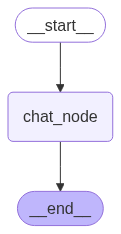

In [20]:
workflow

In [ ]:
# like each person intracting have their own thread id, so bot can config who is taking now 
# like for momina thread id -> 1

thread_id = "1"

while True:
    query = input("Enter your question : ")
    print("Me : ", query)
    q = query.strip().lower()

    if q in ["exit", "quit", "bye"]:
        break
    
    config = {"configurable" : {"thread_id" : thread_id}}
    
    # every time u invoke .. state from the memory erase and start from the scratch .. so no memory of previous messages .. but due to config we can store it inj memory, once we restart the kernal the memory from RAM disappear
    result = workflow.invoke({
        "messages": HumanMessage(content=query)
    }, config=config)

    ai_reply = result["messages"][-1].content
    print("AI:", ai_reply)


Me :  hii, my name is momina
AI: Hello Momina! How can I assist you today?
Me :  tell me whats my name 
AI: Your name is Momina. How can I help you further?
Me :  ok now add 4+5
AI: 4 + 5 equals 9.
Me :  now in result add 1
AI: Adding 1 to the previous result of 9 gives you 10.
Me :  u remeber my name ?
AI: Yes, your name is Momina.
Me :  bye 


In [24]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hii, my name is momina', additional_kwargs={}, response_metadata={}, id='c856c19f-789e-4295-91f7-266b4e797309'), AIMessage(content='Hello Momina! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 15, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CIfdRKBY9ucdgVghhkauuDe39oxyS', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--177f90bc-abb7-4c24-ac0b-508559605135-0', usage_metadata={'input_tokens': 15, 'output_tokens': 11, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning':

In [26]:
list(workflow.get_state_history(config=config))

[StateSnapshot(values={'messages': [HumanMessage(content='hii, my name is momina', additional_kwargs={}, response_metadata={}, id='c856c19f-789e-4295-91f7-266b4e797309'), AIMessage(content='Hello Momina! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 15, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CIfdRKBY9ucdgVghhkauuDe39oxyS', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--177f90bc-abb7-4c24-ac0b-508559605135-0', usage_metadata={'input_tokens': 15, 'output_tokens': 11, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning'